### Section 1: COVID19 dataset & Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Task:
### Visualize the data for India, China & US countries
### Section 2: Finding a good Measure

In [2]:
covid_df = pd.read_csv("time_series_covid_19_confirmed.csv")
covid_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,937,939,939,944,955,955,955,963,963,977
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762


#### Drop ‘Lat’ & ‘Long’ columns. Grouped the data with ‘Country/Region ‘using sum as an aggregate function

In [3]:
covid_df.drop(columns=['Lat','Long'],inplace=True)

In [4]:
covid_df=covid_df.groupby('Country/Region').sum()
covid_df=covid_df.reset_index()

### Task:Visualize the data for India, China & US countries
### Section 2: Finding a good Measure

In [5]:
covid_df.set_index('Country/Region',inplace=True)

In [6]:
covid_df_ind_china_us = covid_df.loc[['India','China','US']]
covid_df_ind_china_us

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
India,0,0,0,0,0,0,0,0,1,1,...,1855745,1908254,1964536,2027074,2088611,2153010,2215074,2268675,2329638,2396637
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,88099,88206,88328,88460,88580,88672,88793,88906,88958,89045
US,1,1,2,2,5,5,5,5,5,7,...,4713540,4771080,4823890,4883582,4941755,4997929,5044864,5094400,5141208,5197118


In [7]:
covid_df_ind_china_us.reset_index(inplace=True)

In [8]:
covid_df_ind_china_us_infection_rate= covid_df_ind_china_us.melt(id_vars='Country/Region',var_name='Date',value_name='confirmed_numbers')

In [9]:
covid_df_ind_china_us_infection_rate["Date"]= pd.to_datetime(covid_df_ind_china_us_infection_rate["Date"]) 

In [10]:
covid_df_ind_china_us_infection_rate.sort_values(by=['Country/Region','Date'],inplace=True)

In [11]:
covid_df_ind_china_us_infection_rate = covid_df_ind_china_us_infection_rate.groupby(['Country/Region','Date']).sum()

In [12]:
covid_df_ind_china_us_infection_rate['Infection_rate'] = covid_df_ind_china_us_infection_rate['confirmed_numbers'].diff()

In [13]:
covid_df_ind_china_us_infection_rate

confirmed_numbers  Infection_rate
Country/Region Date                                         
China          2020-01-22                548             NaN
               2020-01-23                643            95.0
               2020-01-24                920           277.0
               2020-01-25               1406           486.0
               2020-01-26               2075           669.0
...                                      ...             ...
US             2020-08-08            4997929         56174.0
               2020-08-09            5044864         46935.0
               2020-08-10            5094400         49536.0
               2020-08-11            5141208         46808.0
               2020-08-12            5197118         55910.0

[612 rows x 2 columns]

## calculate the maximum infection rate for India, China & US

In [14]:
covid_df_ind_china_us_infection_rate['Infection_rate'].groupby(['Country/Region']).max()

Country/Region
China    15136.0
India    66999.0
US       77255.0
Name: Infection_rate, dtype: float64

In [15]:
covid_df_ind_china_us_infection_rate.reset_index(inplace=True)

In [16]:
covid_df_ind_china_us_infection_rate.set_index('Country/Region',inplace=True)

<AxesSubplot:>

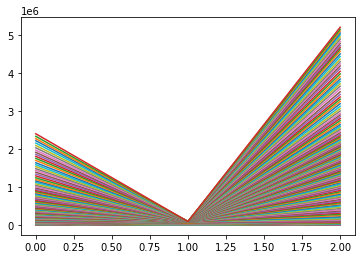

In [17]:
covid_df_ind_china_us.plot(legend=False)

# Task:
### Calculate the maximum ‘Infection Rate’ for each country and store it in a new column named ‘max_infection_rate’

In [18]:
covid_df_all_country = covid_df

In [19]:
covid_df_all_country.reset_index(inplace=True)
#covid_df_all_country.drop(columns=['level_0','index'],inplace=True)

In [20]:
covid_df_all_country= covid_df_all_country.melt(id_vars='Country/Region',var_name='Date',value_name='confirmed_numbers')
covid_df_all_country

,Country/Region,Date,confirmed_numbers
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0
...,...,...,...
38347,West Bank and Gaza,8/12/20,15184
38348,Western Sahara,8/12/20,10
38349,Yemen,8/12/20,1841
38350,Zambia,8/12/20,8501


In [21]:
covid_df_all_country["Date"]= pd.to_datetime(covid_df_all_country["Date"])

In [22]:
covid_df_all_country.sort_values(by=['Country/Region','Date'],inplace=True)

In [23]:
covid_df_all_country = covid_df_all_country.groupby(['Country/Region','Date']).sum()

In [24]:
covid_df_all_country['Infection_rate'] = covid_df_all_country['confirmed_numbers'].diff()

In [25]:
covid_df_all_country_max = covid_df_all_country.drop(columns='confirmed_numbers',inplace=False).groupby(['Country/Region']).max()


In [26]:
covid_df_all_country.reset_index(inplace=True)

In [27]:
covid_df_all_country=covid_df_all_country.pivot(index='Country/Region',columns= ['Date'] , values=['confirmed_numbers','Infection_rate'])

In [28]:
covid_df_all_country_max.rename(columns={"Infection_rate":"max_infection_rate"},inplace=True)

In [29]:
covid_df_all_country=covid_df_all_country_max.join(covid_df_all_country)

c:\users\jagadish\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


In [30]:
covid_df_all_country

,max_infection_rate,"(confirmed_numbers, 2020-01-22 00:00:00)","(confirmed_numbers, 2020-01-23 00:00:00)","(confirmed_numbers, 2020-01-24 00:00:00)","(confirmed_numbers, 2020-01-25 00:00:00)","(confirmed_numbers, 2020-01-26 00:00:00)","(confirmed_numbers, 2020-01-27 00:00:00)","(confirmed_numbers, 2020-01-28 00:00:00)","(confirmed_numbers, 2020-01-29 00:00:00)","(confirmed_numbers, 2020-01-30 00:00:00)",...,"(Infection_rate, 2020-08-03 00:00:00)","(Infection_rate, 2020-08-04 00:00:00)","(Infection_rate, 2020-08-05 00:00:00)","(Infection_rate, 2020-08-06 00:00:00)","(Infection_rate, 2020-08-07 00:00:00)","(Infection_rate, 2020-08-08 00:00:00)","(Infection_rate, 2020-08-09 00:00:00)","(Infection_rate, 2020-08-10 00:00:00)","(Infection_rate, 2020-08-11 00:00:00)","(Infection_rate, 2020-08-12 00:00:00)"
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,915.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.0,35.0,47.0,67.0,119.0,39.0,0.0,108.0,107.0,76.0
Albania,141.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,101.0,130.0,139.0,127.0,135.0,124.0,136.0,125.0,140.0,141.0
Algeria,675.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,507.0,532.0,551.0,571.0,529.0,538.0,467.0,552.0,492.0,495.0
Andorra,79.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,2.0,0.0,5.0,11.0,0.0,0.0,8.0,0.0,14.0
Angola,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,81.0,64.0,51.0,88.0,55.0,34.0,100.0,7.0,56.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,501.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,244.0,229.0,295.0,333.0,324.0,206.0,280.0,302.0,365.0,309.0
Western Sahara,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yemen,116.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,26.0,3.0,5.0,28.0,1.0,7.0,28.0,-1.0,10.0


### Create a New Data Frame name ‘Corona Data’ with ‘Country/Region’ as an index and ‘max_infection_rate’ as a column

In [31]:
Corona_Data = covid_df_all_country
Corona_Data.head()

,max_infection_rate,"(confirmed_numbers, 2020-01-22 00:00:00)","(confirmed_numbers, 2020-01-23 00:00:00)","(confirmed_numbers, 2020-01-24 00:00:00)","(confirmed_numbers, 2020-01-25 00:00:00)","(confirmed_numbers, 2020-01-26 00:00:00)","(confirmed_numbers, 2020-01-27 00:00:00)","(confirmed_numbers, 2020-01-28 00:00:00)","(confirmed_numbers, 2020-01-29 00:00:00)","(confirmed_numbers, 2020-01-30 00:00:00)",...,"(Infection_rate, 2020-08-03 00:00:00)","(Infection_rate, 2020-08-04 00:00:00)","(Infection_rate, 2020-08-05 00:00:00)","(Infection_rate, 2020-08-06 00:00:00)","(Infection_rate, 2020-08-07 00:00:00)","(Infection_rate, 2020-08-08 00:00:00)","(Infection_rate, 2020-08-09 00:00:00)","(Infection_rate, 2020-08-10 00:00:00)","(Infection_rate, 2020-08-11 00:00:00)","(Infection_rate, 2020-08-12 00:00:00)"
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,915.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.0,35.0,47.0,67.0,119.0,39.0,0.0,108.0,107.0,76.0
Albania,141.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,101.0,130.0,139.0,127.0,135.0,124.0,136.0,125.0,140.0,141.0
Algeria,675.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,507.0,532.0,551.0,571.0,529.0,538.0,467.0,552.0,492.0,495.0
Andorra,79.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,2.0,0.0,5.0,11.0,0.0,0.0,8.0,0.0,14.0
Angola,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,81.0,64.0,51.0,88.0,55.0,34.0,100.0,7.0,56.0,27.0


# Section 3: World happiness report dataset

In [32]:
happiness_report = pd.read_csv("worldwide_happiness_report.csv")
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [33]:
happiness_report.drop(columns=['Overall rank', 'Score', 'Generosity', 'Perceptions of corruption'],inplace=True)

In [34]:
happiness_report.set_index('Country or region',inplace=True)
happiness_report

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557
...,...,...,...,...
Rwanda,0.359,0.711,0.614,0.555
Tanzania,0.476,0.885,0.499,0.417
Afghanistan,0.350,0.517,0.361,0.000


# Task:
### Create a DataFrame named ‘data’ by merging ‘happiness_report’ with ‘Corona Data’ and find
### correlation among all variables

In [35]:
data = happiness_report.merge(Corona_Data,left_index=True,right_index=True,how='right')
data

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max_infection_rate,"(confirmed_numbers, 2020-01-22 00:00:00)","(confirmed_numbers, 2020-01-23 00:00:00)","(confirmed_numbers, 2020-01-24 00:00:00)","(confirmed_numbers, 2020-01-25 00:00:00)","(confirmed_numbers, 2020-01-26 00:00:00)",...,"(Infection_rate, 2020-08-03 00:00:00)","(Infection_rate, 2020-08-04 00:00:00)","(Infection_rate, 2020-08-05 00:00:00)","(Infection_rate, 2020-08-06 00:00:00)","(Infection_rate, 2020-08-07 00:00:00)","(Infection_rate, 2020-08-08 00:00:00)","(Infection_rate, 2020-08-09 00:00:00)","(Infection_rate, 2020-08-10 00:00:00)","(Infection_rate, 2020-08-11 00:00:00)","(Infection_rate, 2020-08-12 00:00:00)"
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.350,0.517,0.361,0.000,915.0,0.0,0.0,0.0,0.0,0.0,...,37.0,35.0,47.0,67.0,119.0,39.0,0.0,108.0,107.0,76.0
Albania,0.947,0.848,0.874,0.383,141.0,0.0,0.0,0.0,0.0,0.0,...,101.0,130.0,139.0,127.0,135.0,124.0,136.0,125.0,140.0,141.0
Algeria,1.002,1.160,0.785,0.086,675.0,0.0,0.0,0.0,0.0,0.0,...,507.0,532.0,551.0,571.0,529.0,538.0,467.0,552.0,492.0,495.0
Andorra,NaN,NaN,NaN,NaN,79.0,0.0,0.0,0.0,0.0,0.0,...,12.0,2.0,0.0,5.0,11.0,0.0,0.0,8.0,0.0,14.0
Angola,NaN,NaN,NaN,NaN,100.0,0.0,0.0,0.0,0.0,0.0,...,81.0,64.0,51.0,88.0,55.0,34.0,100.0,7.0,56.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,NaN,NaN,NaN,501.0,0.0,0.0,0.0,0.0,0.0,...,244.0,229.0,295.0,333.0,324.0,206.0,280.0,302.0,365.0,309.0
Western Sahara,NaN,NaN,NaN,NaN,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yemen,0.287,1.163,0.463,0.143,116.0,0.0,0.0,0.0,0.0,0.0,...,0.0,26.0,3.0,5.0,28.0,1.0,7.0,28.0,-1.0,10.0


In [36]:
data_plot = data[['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','max_infection_rate']]

In [37]:
data_plot.reset_index(inplace=True)

In [38]:
data_plot.iloc[[79,80,90,100]]


,Country/Region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max_infection_rate
79,India,0.755,0.765,0.588,0.498,66999.0
80,Indonesia,0.931,1.203,0.660,0.491,2657.0
90,Kenya,0.512,0.983,0.581,0.431,960.0
100,Libya,1.044,1.303,0.673,0.416,478.0


In [39]:
data_plot.set_index("Country/Region",inplace=True)

In [40]:
data_plot

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max_infection_rate
Country/Region,,,,,
Afghanistan,0.350,0.517,0.361,0.000,915.0
Albania,0.947,0.848,0.874,0.383,141.0
Algeria,1.002,1.160,0.785,0.086,675.0
Andorra,NaN,NaN,NaN,NaN,79.0
Angola,NaN,NaN,NaN,NaN,100.0
...,...,...,...,...,...
West Bank and Gaza,NaN,NaN,NaN,NaN,501.0
Western Sahara,NaN,NaN,NaN,NaN,4.0
Yemen,0.287,1.163,0.463,0.143,116.0


### Corelation of all the available variable

In [41]:
data_plot.corr()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max_infection_rate
GDP per capita,1.000000,0.757521,0.859431,0.394799,0.100475
Social support,0.757521,1.000000,0.751632,0.456317,0.067720
Healthy life expectancy,0.859431,0.751632,1.000000,0.423146,0.088250
Freedom to make life choices,0.394799,0.456317,0.423146,1.000000,0.088359
max_infection_rate,0.100475,0.067720,0.088250,0.088359,1.000000


### Max_infection_rate vs all countries (Using Seaborn to plot charts are in below respective sections)
##### In this plot we can see that the infections are more in India, US, South Africa and Brazil 

In [42]:
data_plot.reset_index(inplace=True)

<AxesSubplot:ylabel='Country/Region'>

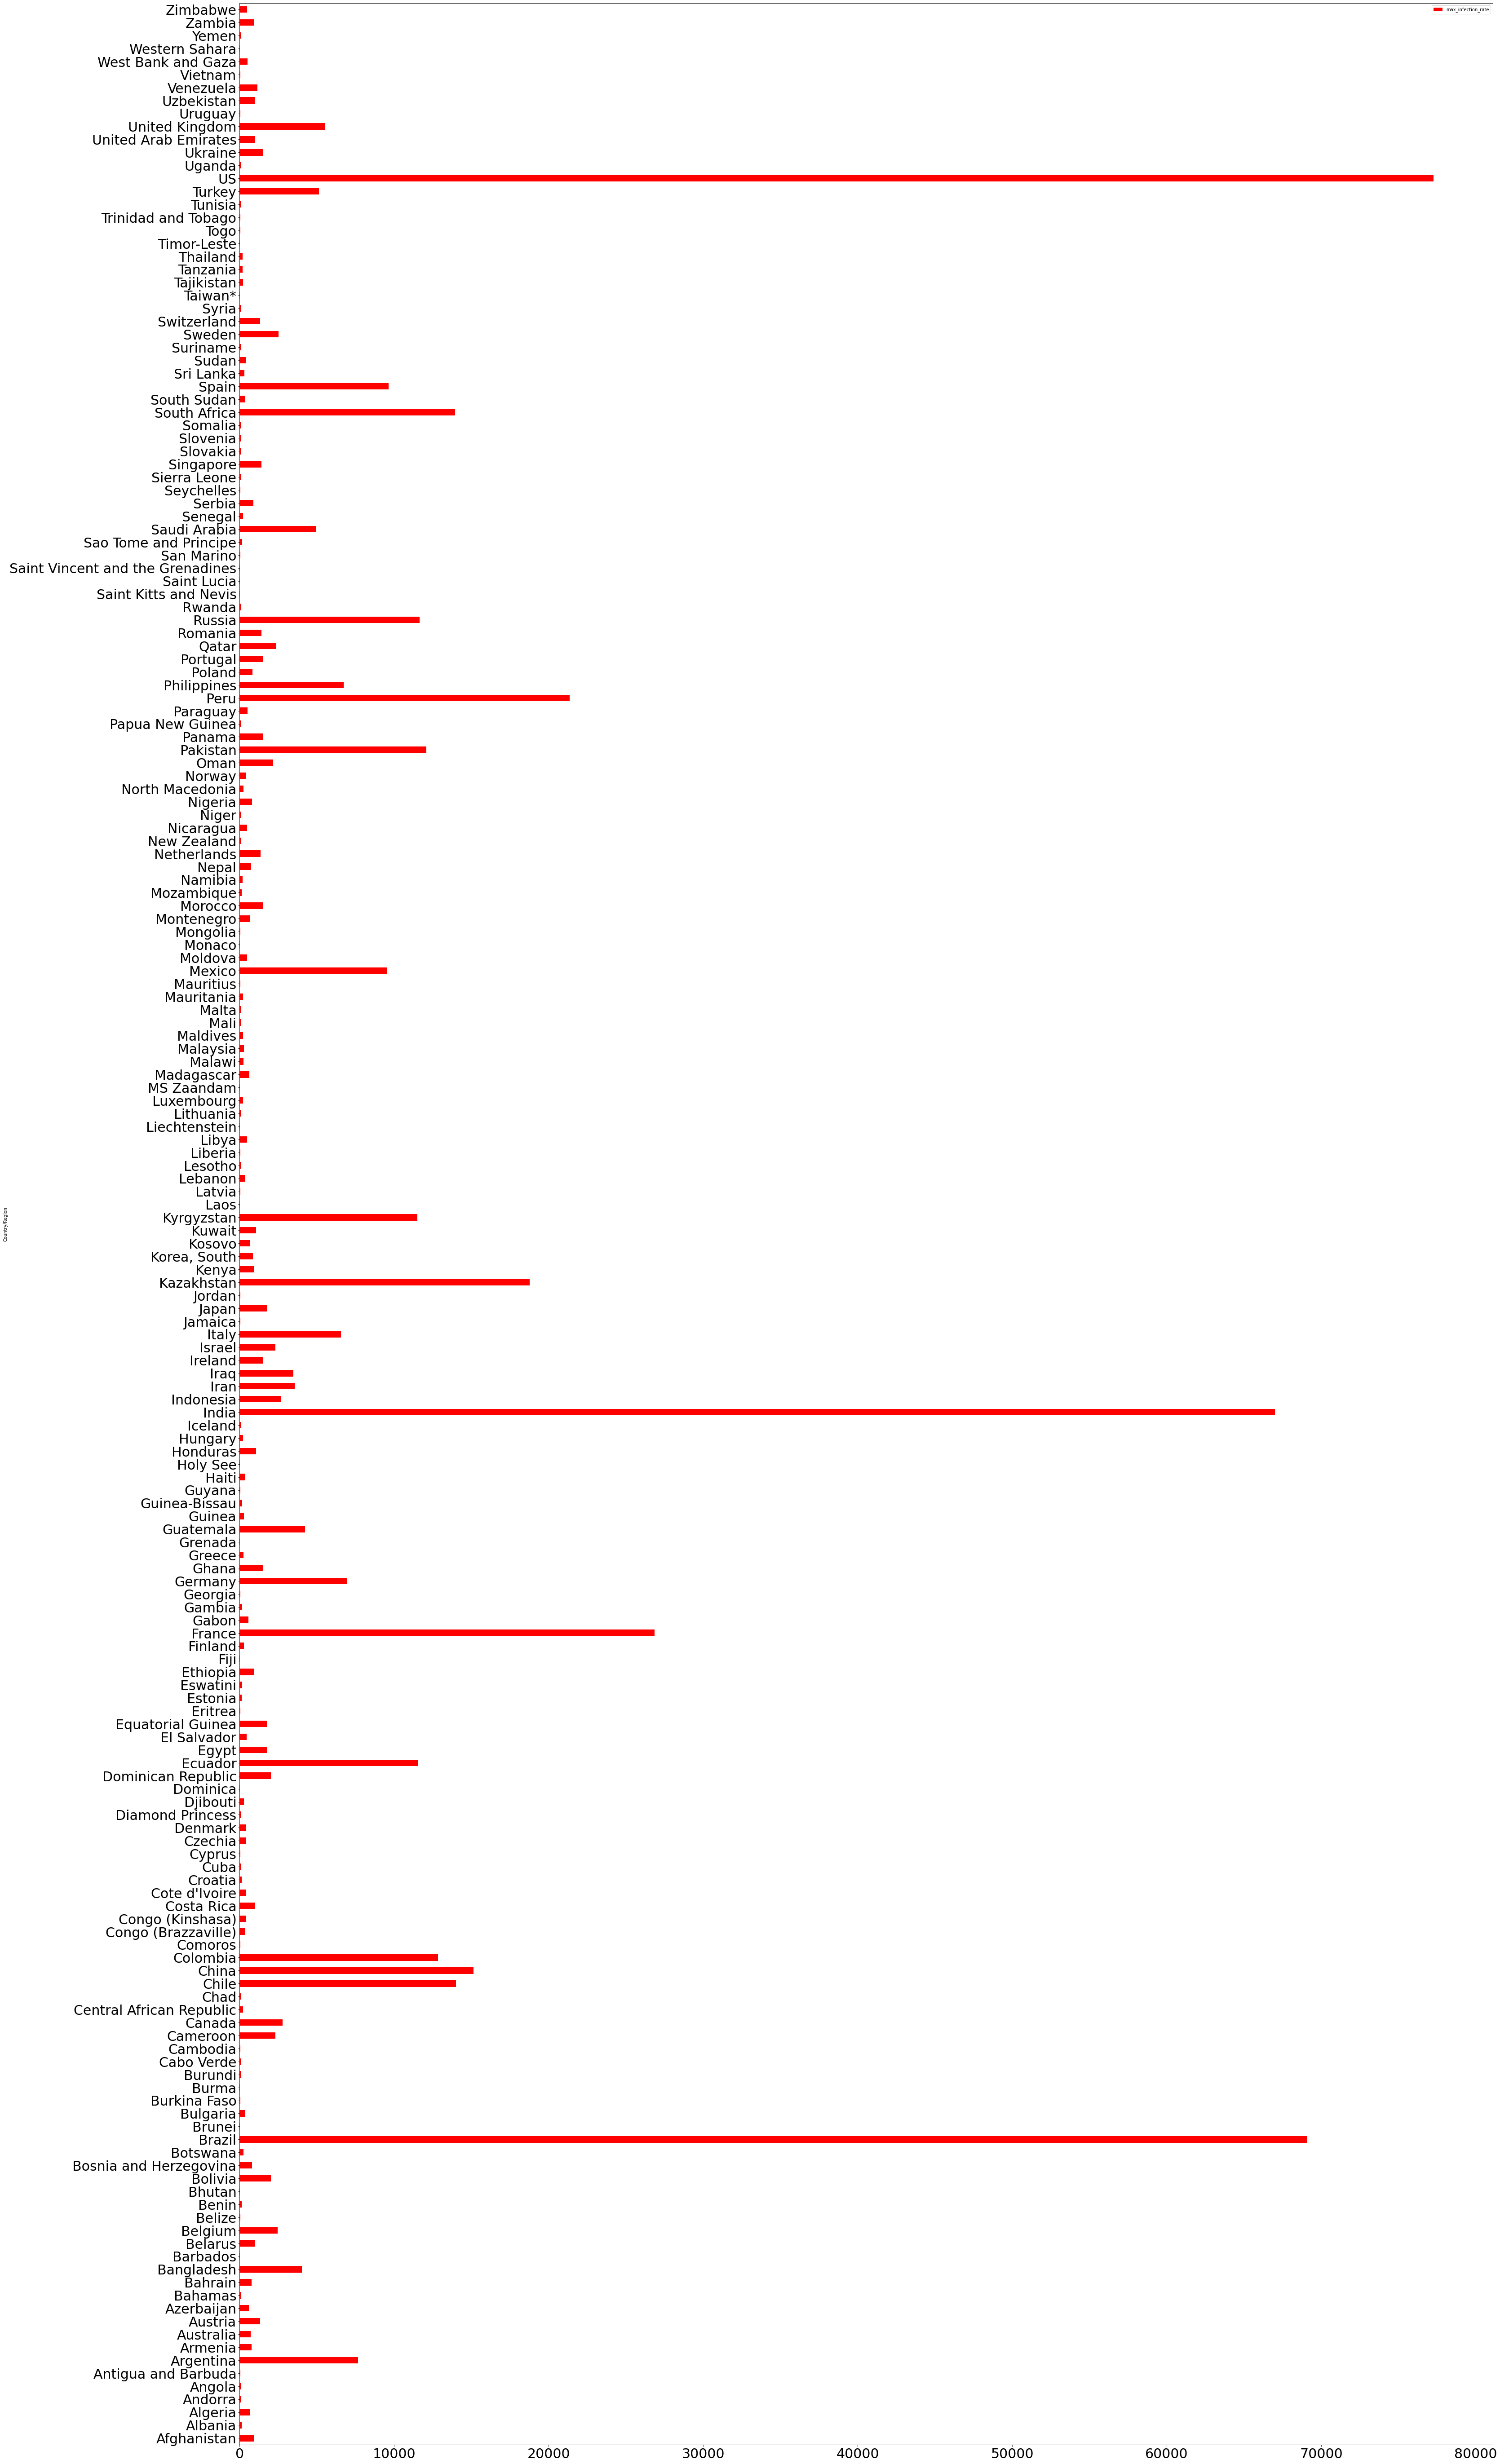

In [43]:
data_plot.plot(kind='barh', x='Country/Region', y='max_infection_rate', color='red',figsize=[50,100],fontsize =30)

#### Maximum infection rate vs GDP
##### Here we can see that the mid gdp per captia countries are having infection rate to larger extent, then too lower or higher gdp per captia countiries

<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rate'>

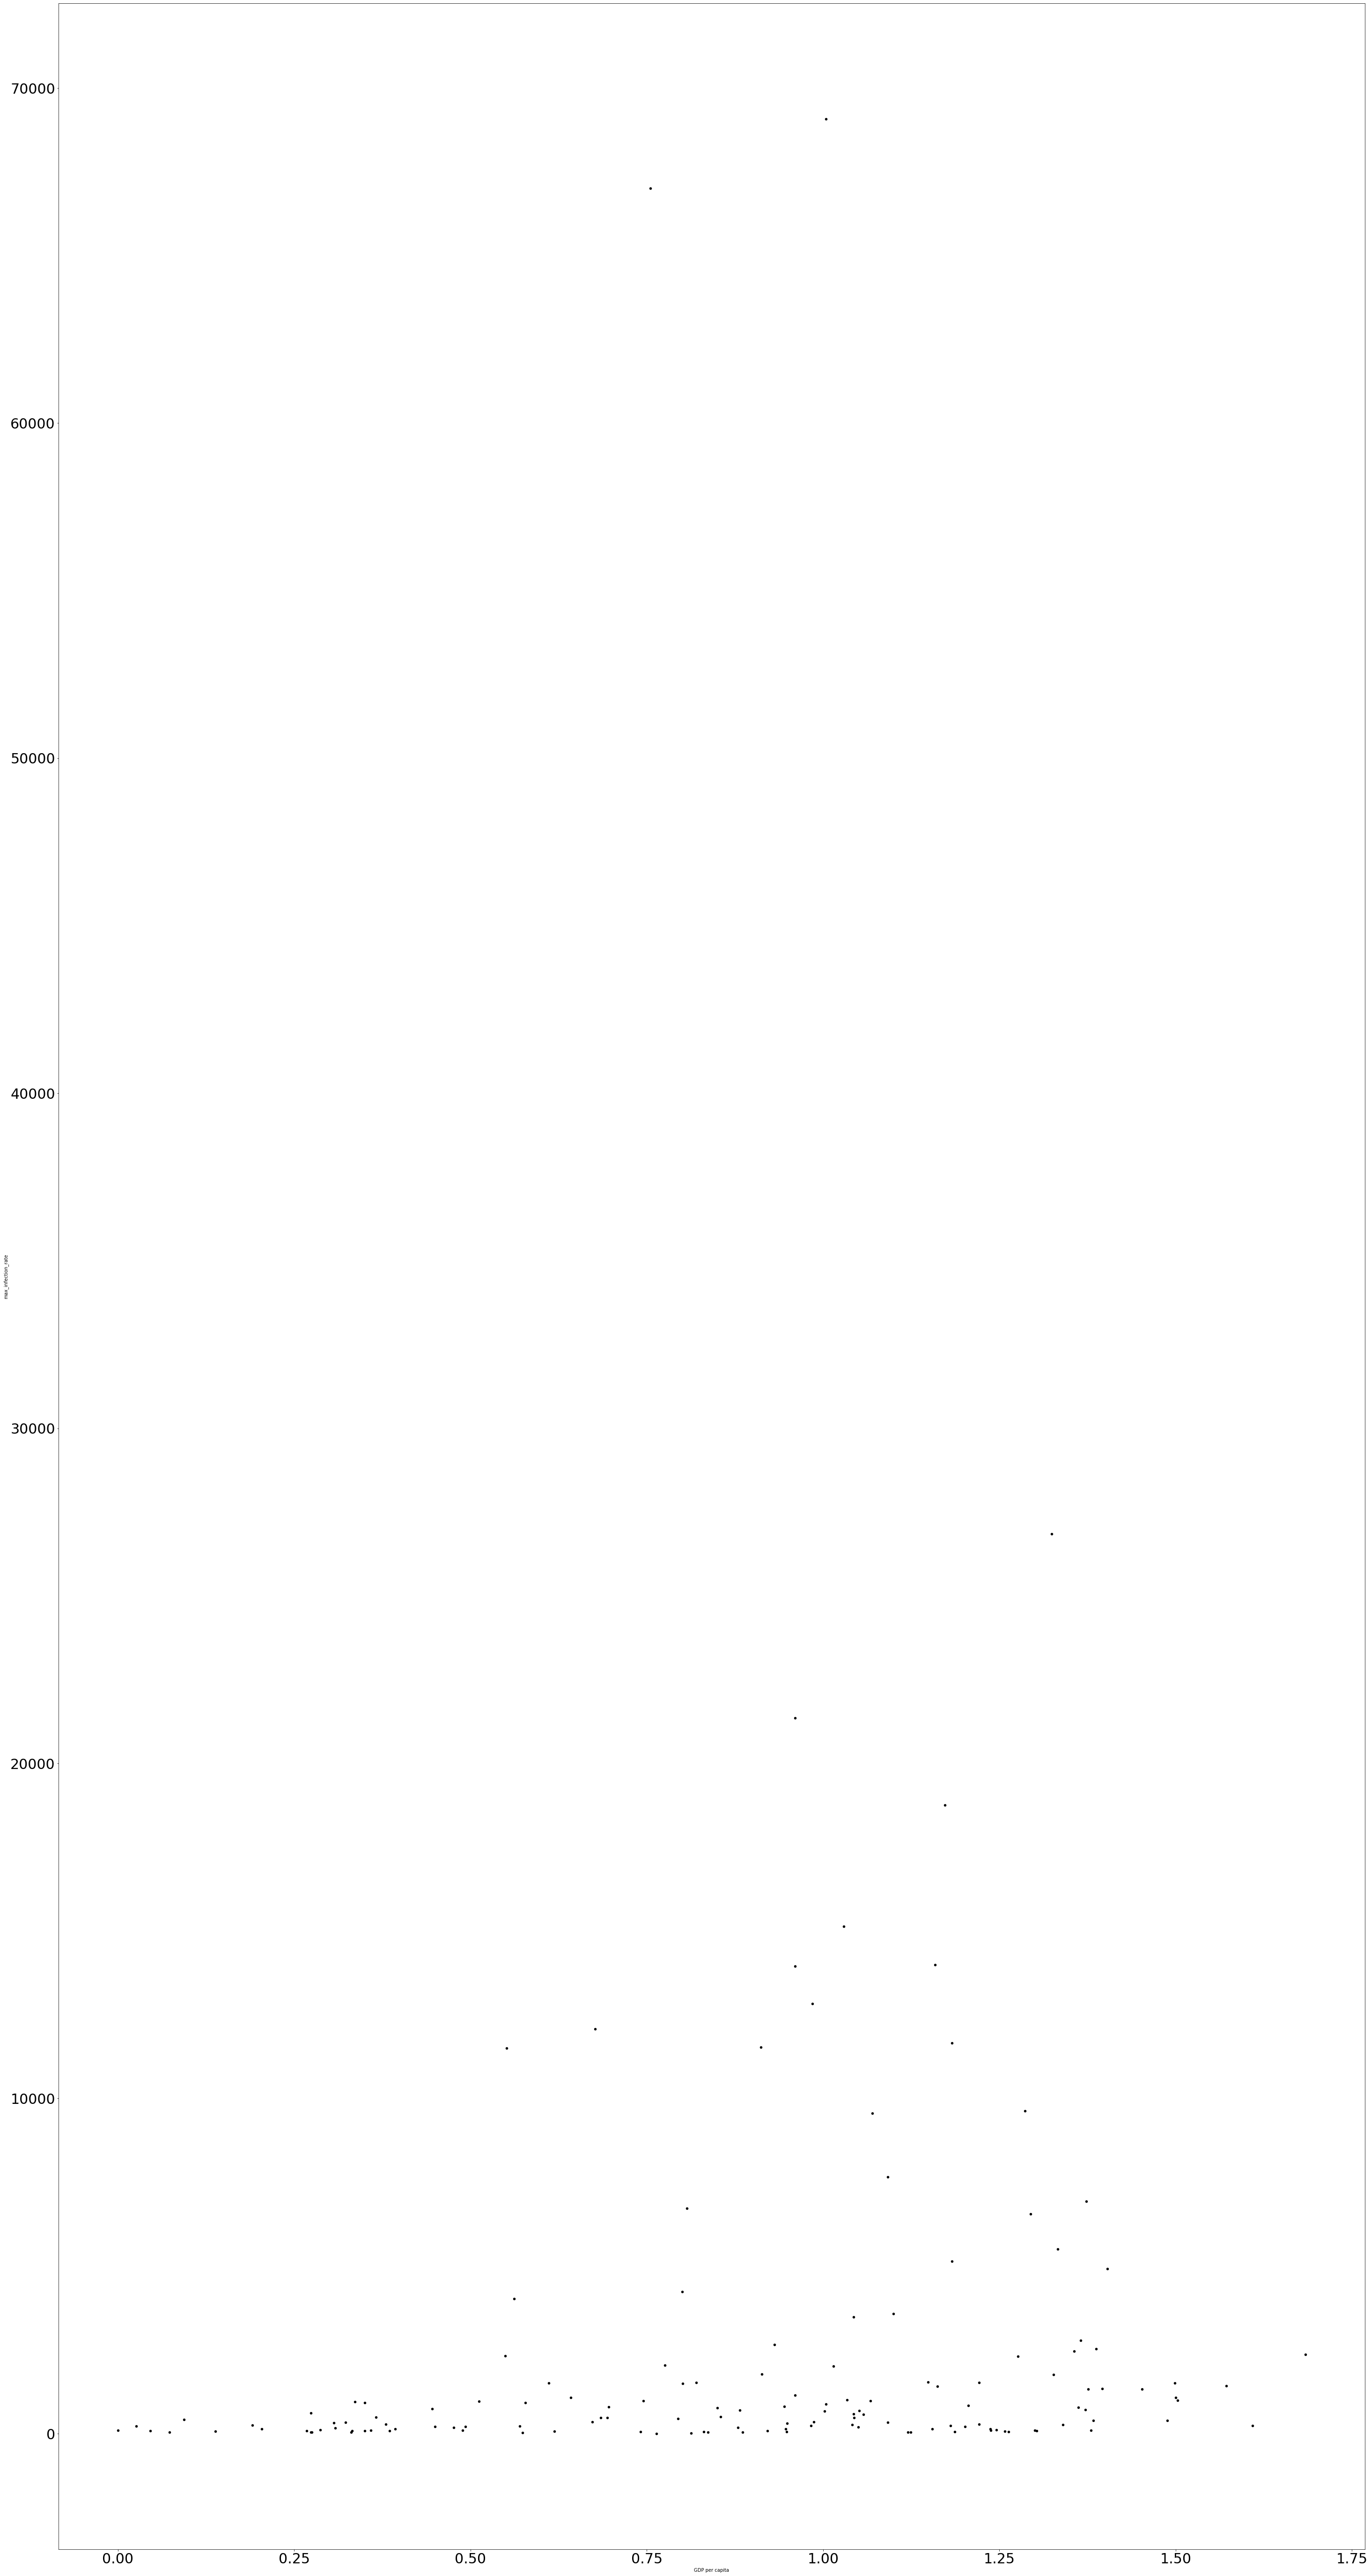

In [44]:
data_plot.plot(kind='scatter', x='GDP per capita', y='max_infection_rate', color='black',figsize=[50,100],fontsize =30)

#### Maximum infection rate vs Healthy life expectancy

<AxesSubplot:ylabel='Social support'>

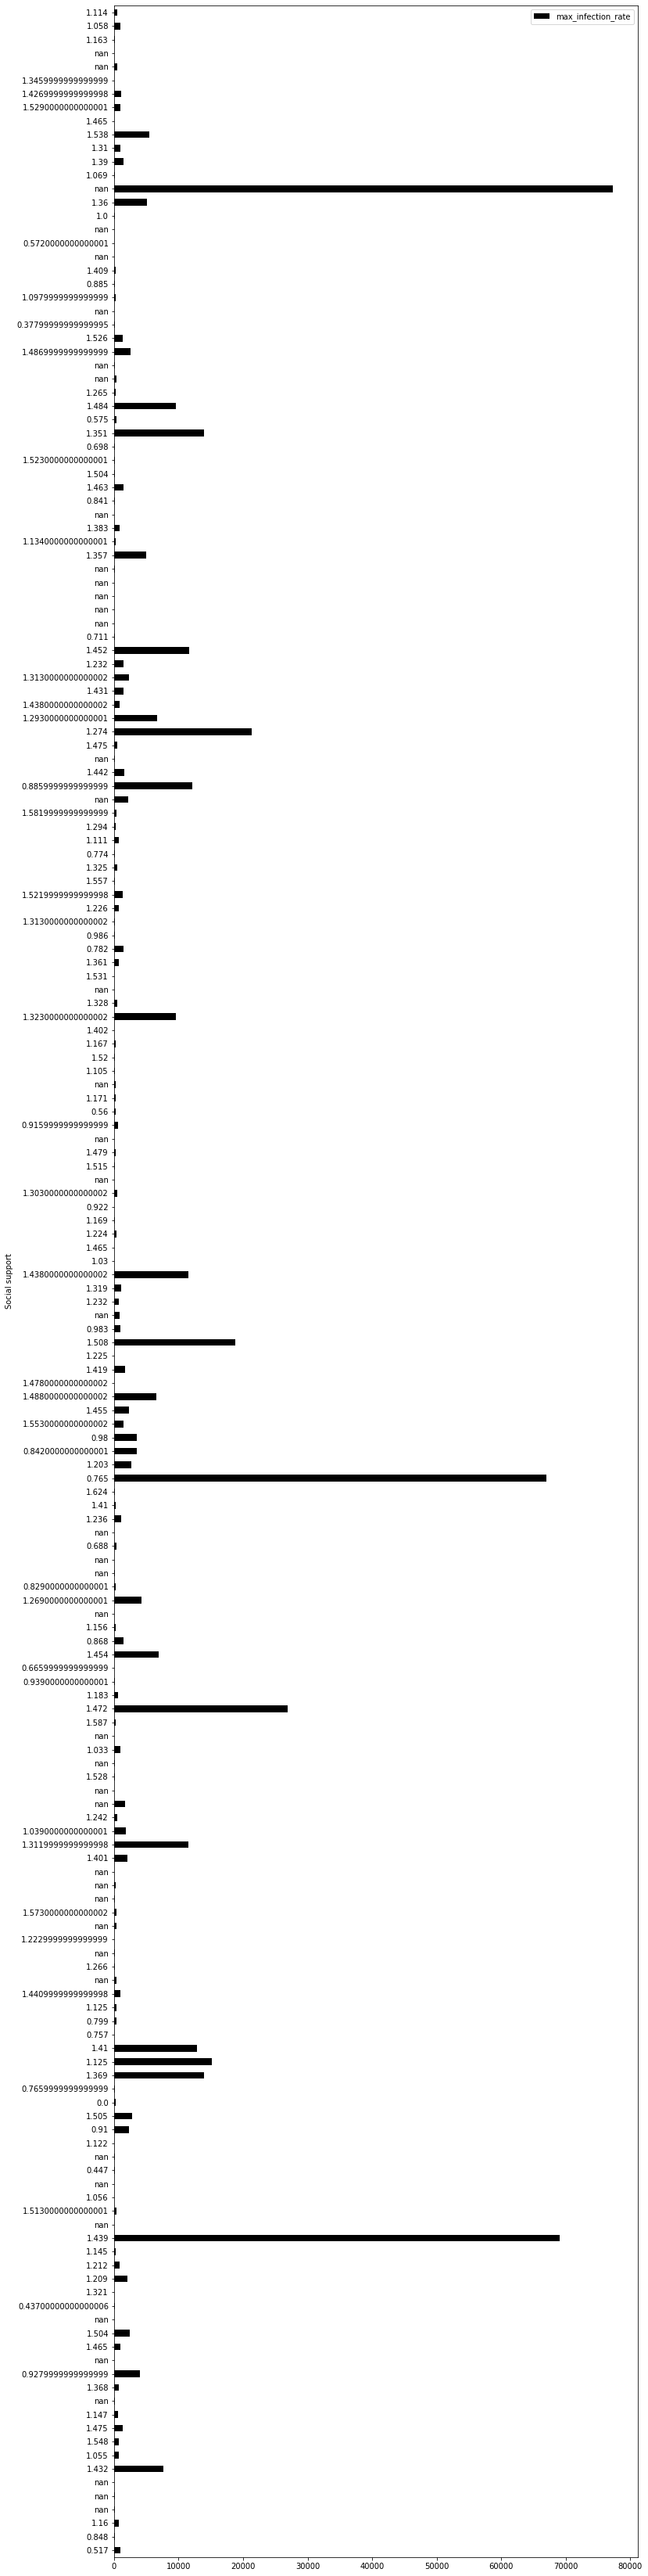

In [45]:
data_plot.plot(kind='barh', x='Social support', y='max_infection_rate', color='black',figsize=[12,60])

## Section 4: Visualization using Folium Map

### Task:
#### Visualize the data2 using Folium world map

In [46]:
import folium

In [47]:
covid_df2 = pd.read_csv("time_series_covid_19_confirmed.csv")
covid_df2.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,937,939,939,944,955,955,955,963,963,977
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762


In [48]:
covid_df2=covid_df2.groupby('Country/Region').sum()

In [49]:
covid_df2.reset_index(inplace=True)

In [50]:
covid_df2=covid_df2[['Country/Region','Lat','Long']]

In [51]:
covid_df2.set_index('Country/Region',inplace=True)

In [52]:
covid_df2.head()

,Lat,Long
Country/Region,,
Afghanistan,33.93911,67.709953
Albania,41.15330,20.168300
Algeria,28.03390,1.659600
Andorra,42.50630,1.521800
Angola,-11.20270,17.873900


In [53]:
data=covid_df2.merge(data,left_index=True,right_index=True,how='inner')

#### data dataframe has Lat and Long now

In [54]:
data

,Lat,Long,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max_infection_rate,"(confirmed_numbers, 2020-01-22 00:00:00)","(confirmed_numbers, 2020-01-23 00:00:00)","(confirmed_numbers, 2020-01-24 00:00:00)",...,"(Infection_rate, 2020-08-03 00:00:00)","(Infection_rate, 2020-08-04 00:00:00)","(Infection_rate, 2020-08-05 00:00:00)","(Infection_rate, 2020-08-06 00:00:00)","(Infection_rate, 2020-08-07 00:00:00)","(Infection_rate, 2020-08-08 00:00:00)","(Infection_rate, 2020-08-09 00:00:00)","(Infection_rate, 2020-08-10 00:00:00)","(Infection_rate, 2020-08-11 00:00:00)","(Infection_rate, 2020-08-12 00:00:00)"
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.939110,67.709953,0.350,0.517,0.361,0.000,915.0,0.0,0.0,0.0,...,37.0,35.0,47.0,67.0,119.0,39.0,0.0,108.0,107.0,76.0
Albania,41.153300,20.168300,0.947,0.848,0.874,0.383,141.0,0.0,0.0,0.0,...,101.0,130.0,139.0,127.0,135.0,124.0,136.0,125.0,140.0,141.0
Algeria,28.033900,1.659600,1.002,1.160,0.785,0.086,675.0,0.0,0.0,0.0,...,507.0,532.0,551.0,571.0,529.0,538.0,467.0,552.0,492.0,495.0
Andorra,42.506300,1.521800,NaN,NaN,NaN,NaN,79.0,0.0,0.0,0.0,...,12.0,2.0,0.0,5.0,11.0,0.0,0.0,8.0,0.0,14.0
Angola,-11.202700,17.873900,NaN,NaN,NaN,NaN,100.0,0.0,0.0,0.0,...,81.0,64.0,51.0,88.0,55.0,34.0,100.0,7.0,56.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,31.952200,35.233200,NaN,NaN,NaN,NaN,501.0,0.0,0.0,0.0,...,244.0,229.0,295.0,333.0,324.0,206.0,280.0,302.0,365.0,309.0
Western Sahara,24.215500,-12.885800,NaN,NaN,NaN,NaN,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yemen,15.552727,48.516388,0.287,1.163,0.463,0.143,116.0,0.0,0.0,0.0,...,0.0,26.0,3.0,5.0,28.0,1.0,7.0,28.0,-1.0,10.0


In [55]:
data2=data
data2.reset_index(inplace=True)

# Task:
## Visualize the data2 using Folium world map



In [56]:
# define the world map
world_map = folium.Map(location=[0,0], zoom_start=3)

for i in range(len(data2)):
    folium.Circle(location=[data2.iloc[i]['Lat'],data2.iloc[i]['Long']],color='blue',fill='Blue',
                 tooltip='<li><bold> Country/Region: '+str(data2.iloc[i]['Country/Region'])+
                         '<li><bold> Max Infection Rate: '+str(data2.iloc[i]['max_infection_rate']),
                 radius=int(data2.iloc[i]['max_infection_rate'])**1).add_to(world_map)
# display world map
world_map

# Section5: Visualization of results using Seaborn.


# Task:
### Based on the plot above, comment on the Indicators having strong relationship with COVID19
### Infection?

Text(0.5, 1.0, 'Max Infection Rate by GDP')

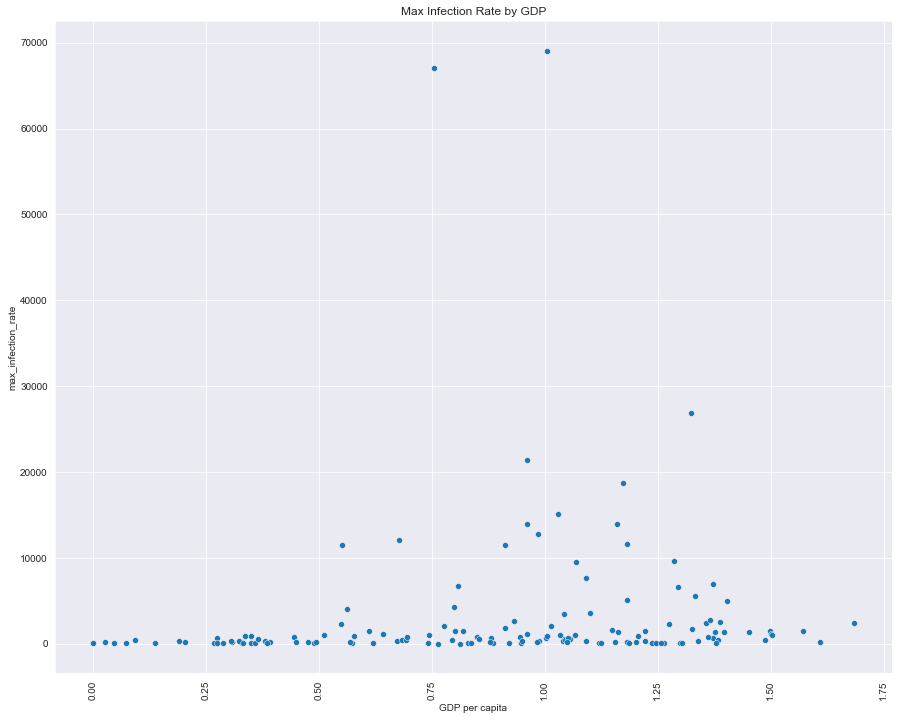

In [57]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,12))
sns.scatterplot(x = data_plot['GDP per capita'],y = data_plot['max_infection_rate'],palette='YlOrRd')
plt.xticks(rotation=90)
plt.title('Max Infection Rate by GDP')


### Here we can see that the mid gdp per captia countries are having infection rate to larger extent, then too lower or higher gdp per captia countiries

Text(0.5, 1.0, 'Max Infection Rate by Social support Index')

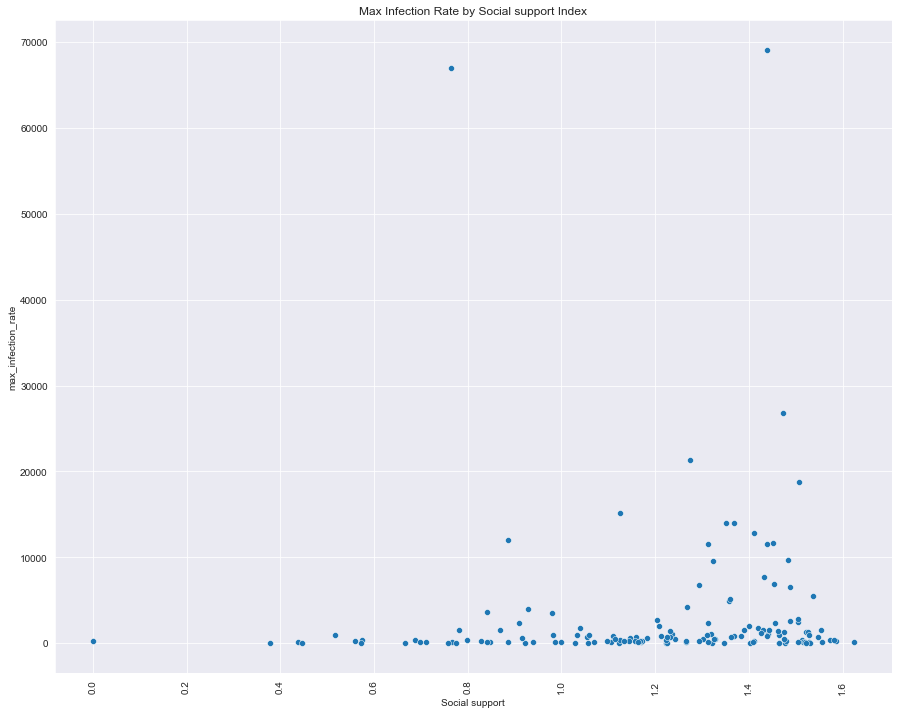

In [58]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,12))
sns.scatterplot(x = data_plot['Social support'],y = data_plot['max_infection_rate'],palette='YlOrRd')
plt.xticks(rotation=90)
plt.title('Max Infection Rate by Social support Index')

### Here where ever the Social support is better we are seeing high infecetion rate

Text(0.5, 1.0, 'Max Infection Rate by Healthy life expectancy Index')

<Figure size 1080x864 with 0 Axes>

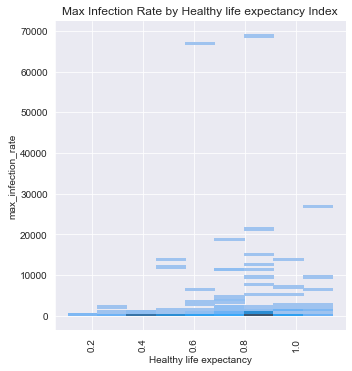

In [59]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,12))
sns.displot(x = data_plot['Healthy life expectancy'],y = data_plot['max_infection_rate'],palette='YlOrRd')
plt.xticks(rotation=90)
plt.title('Max Infection Rate by Healthy life expectancy Index')


### We can see the as the healthy life expectancy is heigher expect some outliers the other data seems just okay

Text(0.5, 1.0, 'Max Infection Rate by Freedom to make life choices Index')

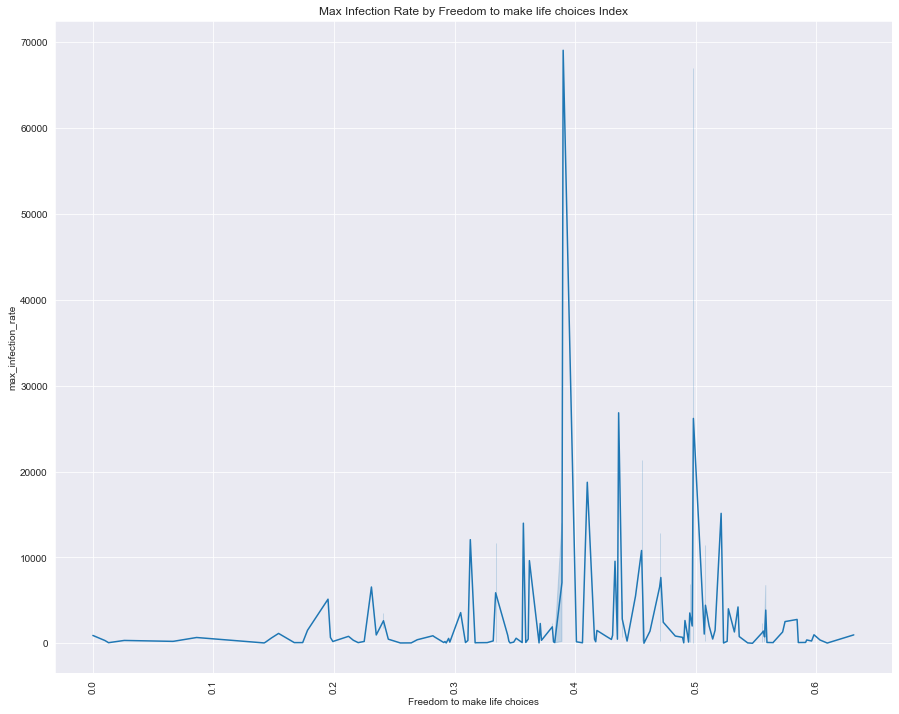

In [60]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,12))
sns.lineplot(x = data_plot['Freedom to make life choices'],y = data_plot['max_infection_rate'],palette='YlOrRd')
plt.xticks(rotation=90)
plt.title('Max Infection Rate by Freedom to make life choices Index')

### Countries which are having lesser freedom of choices there seem to be very less infections only mid level indexed are more porne to large infections

# Task:
### Based on the plot above, comment on the Indicators having strong relationship with COVID19 Infection?


### I feel based on the plot and analysis, ignoring few outliers. This are the following conclusion i can draw. 

### 1- Countries having mid level gdp per captia are very much at high risk of visible infections
### 2- Better Social support index is a good recipe for high rate of infecetion rate
### 3- Apart from few outliers where there is good healthy life expectancy index, there is mediocre level of risks,   but where there is low level of healthy index we see lower rate of infections, based on the data provided. 
### 4- If freedom of choices are better we see a trend of high risk of infections